# Insights from the Ford 2019 Bike System

In [1]:
# import of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the bike cleaned dataset

df_bike = pd.read_csv('bike clean data.csv')
df_bike.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Start_time,End_time,Start_date,End_date,member_birth_year_intervals
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,17:32:10.145000,08:01:55.975000,2019-02-28,2019-03-01,1980
1,61854,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,12:13:13.218000,05:24:08.146000,2019-02-28,2019-03-01,1970
2,36490,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,17:54:26.010000,04:02:36.842000,2019-02-28,2019-03-01,1985
3,1585,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,23:54:18.549000,00:20:44.074000,2019-02-28,2019-03-01,1970
4,1793,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,23:49:58.632000,00:19:51.760000,2019-02-28,2019-03-01,1955


# Insight 1: Percentage of Member Gender present in the bike system

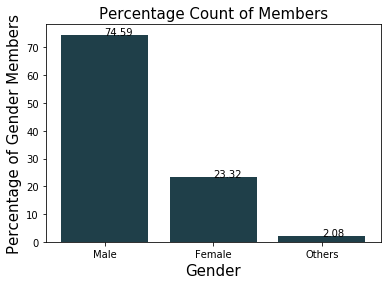

In [3]:
# calculating the percentage of the gender of the members involved
total_member = df_bike['member_gender'].value_counts().sum()
male_percentage = round((df_bike['member_gender'].value_counts()[0]/ total_member) * 100, 2)
female_percentage = round((df_bike['member_gender'].value_counts()[1]/ total_member) * 100, 2)
others_percentage = round((df_bike['member_gender'].value_counts()[2]/ total_member) * 100, 2)

gender = ['Male', 'Female', 'Others']
# Let's define a list for the percentage of the gender
gender_percentage = [male_percentage, female_percentage, others_percentage]

n = 3
r = np.arange(n)
plt.bar(r, gender_percentage, color='#1F3F49')

plt.xlabel('Gender', fontsize=15)
plt.ylabel('Percentage of Gender Members', fontsize=15)
plt.title('Percentage Count of Members', fontsize=15)
plt.xticks(r, gender)
#plt.yaxis.set_axis(False)
for i in range(len(r)):
    plt.text(i, gender_percentage[i], gender_percentage[i])

* From the above plot we can clearly see that the male gender dominated in the bike system, followed by the female and others. So we will definitely have more males in the system
* Male assumed 74.59% 
* Female 23.32% 
* Others 2.08%

# Insight 2: Percentage of User Type

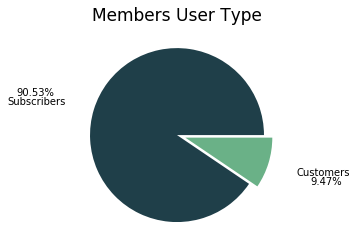

In [4]:
colors = ['#1F3F49', '#6AB187']
explode = (0, 0.1)
plt.pie(df_bike['user_type'].value_counts(), labels=['Subscribers', 'Customers'], autopct= '%1.2f%%', 
        colors=colors, explode=explode, pctdistance=1.7, labeldistance=1.34)
plt.title('Members User Type', fontsize=17);

* We can observe that we have more of the subscribers user type than the customers user type

# Insight 3: Member gender count with respect to user type

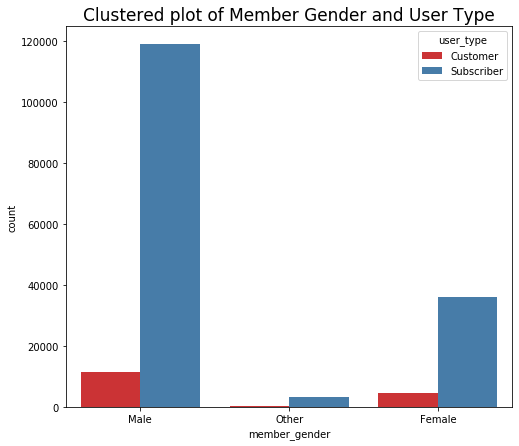

In [5]:
plt.figure(figsize=(8, 7))
sns.countplot(data=df_bike, x='member_gender', hue='user_type', palette='Set1')
plt.title('Clustered plot of Member Gender and User Type', fontsize=17);

* We have more of the male gender in the biking system.
* We have more of the Subscribers in the biking system than the Customers User type.

# Insight 4: Spread of bike shared during the trip

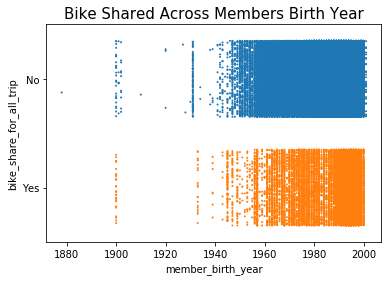

In [6]:
sns.stripplot(data=df_bike, y='bike_share_for_all_trip', x='member_birth_year', orient='h', jitter=0.35, size=2)
plt.title('Bike Shared Across Members Birth Year', fontsize=15);

* From the plot above, it is observed that the 'No' bike shared for the trip have members with birth year from 1880 - 2000+. While the 'Yes' bike shared for the trip have members from 1900 to 2000.

* The 'No' bike shared trip for the trip have its members shared across the range, while the 'Yes' bike shared is focused at selected birth years

In [ ]:
!jupyter nbconvert Part_II_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt